# Day 3 作業

## [作業目標]:
熟悉對 HSV 的操作、Histogram equalization,以及二值化的使用。

## [作業重點]:
1. 將 RGB 轉換為 HSV,分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization,並印出處理結果(處理完的圖
片和處理完的 Value)
3. 將 RGB 轉換為 Gray level,再進行單值二值化及自適應二值化



## 解題步驟

1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value
2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)
3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

## 先讀取並顯示圖片

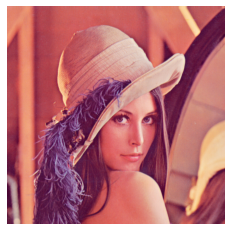

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

img = cv2.imread('IMAGE/lena.png')

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

## 1. 將 RGB 轉換為 HSV，分別印出 Hue, Saturation, Value

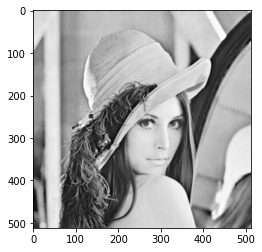

In [10]:

plt.imshow(HSV_img[:,:,2],cmap="gray")

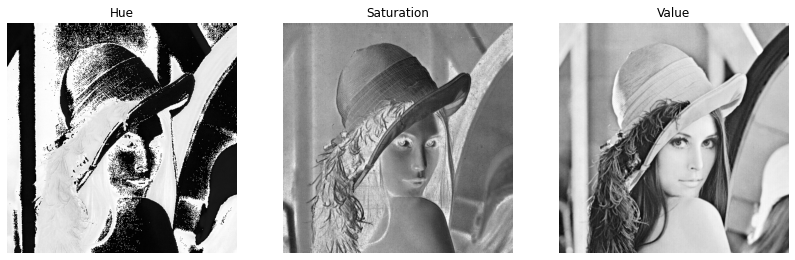

' Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 '

In [13]:
# 將 RGB 轉換為 HSV
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
img = cv2.imread('IMAGE/lena.png')
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 分別印出 Hue, Saturation, Value
title = ['Hue', 'Saturation', 'Value']
plt.figure(figsize=(14,10))
for idx, i in enumerate(title):
    plt.subplot(1,3,idx+1)
    plt.imshow(HSV_img[:,:,idx],cmap="gray")
    plt.axis('off')
    plt.title(i)
plt.show()
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """

## 2. 對 Value 進行 Histogram Equalization，並印出處理結果(處理完的圖片和處理完的 Value)

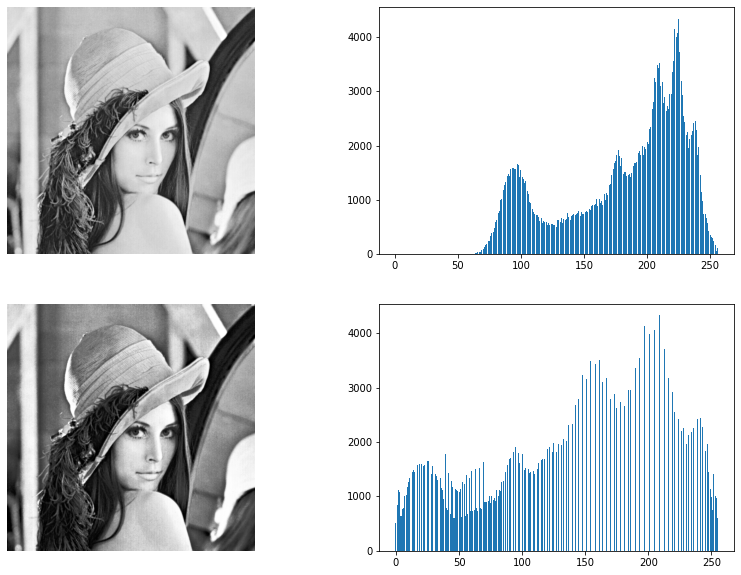

In [15]:
Value = HSV_img[:,:,2]
Value_histgram = cv2.calcHist([Value], [0], None, [256], [0, 256])

change_Value = cv2.equalizeHist(Value)
change_Value_histgram = cv2.calcHist([change_Value], [0], None, [256], [0, 256])


plt.figure(figsize=(14,10))

# 先印出 HE 前的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
plt.subplot(221)
plt.imshow(Value,cmap="gray")
plt.axis("off")
plt.subplot(222)
plt.bar(np.arange(1,257), Value_histgram.squeeze())

# 印出 HE 後的圖片與 value
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
plt.subplot(223)
plt.imshow(change_Value,cmap="gray")
plt.axis("off")
plt.subplot(224)
plt.bar(range(0,256), change_Value_histgram.squeeze())

plt.show()

## 3. 將 RGB 轉換為 Gray level，再進行單值二值化及自適應二值化

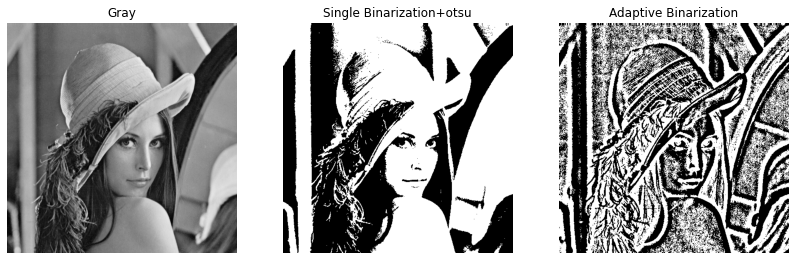

In [28]:
img = cv2.imread('IMAGE/lena.png')

# 灰階圖片
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Single Binarization+otsu
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
ret, th1=cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Adaptive Binarization
""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """
th2=cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 0)

plt.figure(figsize=(14,10))

plt.subplot(131)
plt.imshow(gray,cmap="gray")
plt.title("Gray")
plt.axis("off")
plt.subplot(132)
plt.imshow(th1,cmap="gray")
plt.title("Single Binarization+otsu")
plt.axis("off")
plt.subplot(133)
plt.imshow(th2,cmap="gray")
plt.title("Adaptive Binarization")
plt.axis("off")

plt.show()